In [1]:
import sys; sys.path.append('..')

import xarray as xr 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors

from src.constants import SAVEPATH

%matplotlib inline

In [2]:
dataset_filename = f'../{SAVEPATH}/example_dataset.nc'

ds = xr.load_dataset(dataset_filename)

#constants saved in the attrs dictionary
print(ds.attrs) 

{'v_ini': 1, 'T': 50000, 'H': 30, 'W': 30, 'dt': 0.01}


To look what is inside the dataset : 

In [3]:
ds

<xarray.Dataset>
Dimensions:  (tau: 3, J: 3, eps: 2, v0: 9, a: 3, Ra: 3, phi: 10, R: 10)
Coordinates:
  * tau      (tau) float64 0.1 1.0 10.0
  * J        (J) float64 0.1 1.0 10.0
  * eps      (eps) float64 0.0 0.5
  * v0       (v0) float64 0.1 0.1778 0.3162 0.5623 1.0 1.778 3.162 5.623 10.0
  * a        (a) float64 0.1 1.0 10.0
  * Ra       (Ra) float64 1.0 2.0 3.0
  * phi      (phi) float64 90.0 120.0 150.0 180.0 ... 270.0 300.0 330.0 360.0
  * R        (R) float64 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0
Data variables:
    m        (tau, J, eps, v0, a, Ra, phi, R) float64 nan nan ... 0.101 0.09907
    p        (tau, J, eps, v0, a, Ra, phi, R) float64 nan nan ... 0.2022 0.1976
    v        (tau, J, eps, v0, a, Ra, phi, R) float64 0.0 0.0 ... 0.1334 0.1301
    nnd      (tau, J, eps, v0, a, Ra, phi, R) float64 0.0 0.0 ... 4.589 4.428
    iid      (tau, J, eps, v0, a, Ra, phi, R) float64 0.0 0.0 ... 19.03 18.72
Attributes:
    v_ini:    1
    T:        50000
    H:        30
    W:        30
    dt:       0.01

# Test some parameters and plot a map (milling and polarization)

Select given "coordinates" in the dataset, and look at the result:

In [4]:

ds_ = ds.sel(a   = 10, 
             Ra  = 1, 
             v0  = 3, 
             tau = 1, 
             J   = 1, 
             method='nearest').mean(dim='eps')

ds_

<xarray.Dataset>
Dimensions:  (phi: 10, R: 10)
Coordinates:
    tau      float64 1.0
    J        float64 1.0
    v0       float64 3.162
    a        float64 10.0
    Ra       float64 1.0
  * phi      (phi) float64 90.0 120.0 150.0 180.0 ... 270.0 300.0 330.0 360.0
  * R        (R) float64 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 15.0 16.0
Data variables:
    m        (phi, R) float64 nan nan nan nan ... 0.1095 0.09622 0.08815 0.08007
    p        (phi, R) float64 nan nan nan nan ... 0.9402 0.9542 0.9608 0.9669
    v        (phi, R) float64 0.0 0.0 0.0 0.0 0.0 ... 2.662 2.732 2.774 2.822
    nnd      (phi, R) float64 0.0 0.0 0.0 0.0 0.0 ... 2.036 2.023 1.987 1.978
    iid      (phi, R) float64 0.0 0.0 0.0 0.0 0.0 ... 8.347 8.16 7.951 7.855

Plot the two maps 

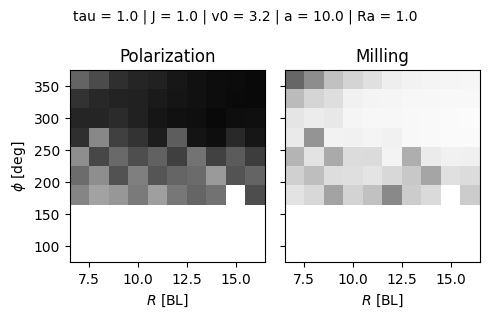

In [15]:
plt.close('all')
fig, axs = plt.subplots(1, 2, figsize=(5, 3.2), sharey=True) 

ax = axs[0]
ax.pcolormesh(ds_.R, 
              ds_.phi, 
              ds_.p, 
              vmin=0, vmax=1, cmap='Greys')

ax.set_ylabel('$\phi$ [deg]')
ax.set_xlabel('$R$ [BL]')
ax.set_title('Polarization')

ax = axs[1]
ax.pcolormesh(ds_.R, 
              ds_.phi, 
              ds_.m, 
              vmin=0, vmax=1, cmap='Greys')


ax.set_xlabel('$R$ [BL]')
ax.set_title('Milling')
fig.suptitle(' | '.join([f'{coord} = {ds_.coords[coord].values:.1f}' for coord in ds_.coords if ds_.coords[coord].values.shape == ()]), fontsize=10)
fig.tight_layout()

# "Matrix of matrix" plot of all data 

One figure is done for a = 1.00


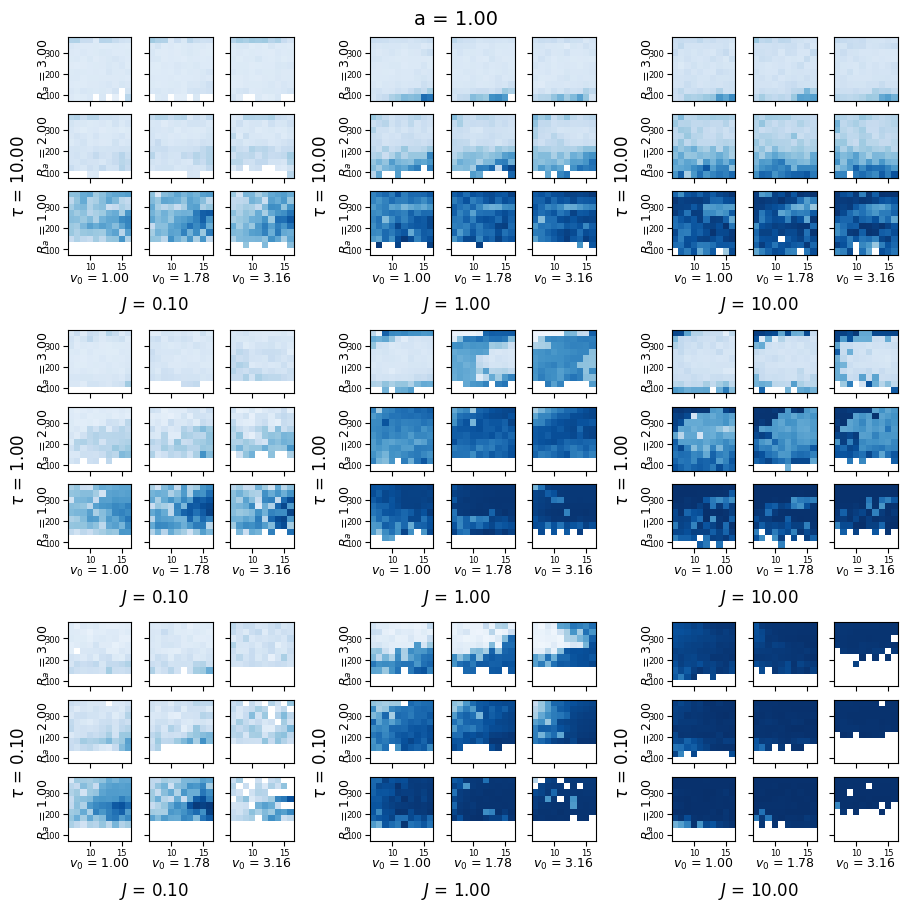

In [16]:
plt.close('all')

for a in [1]:
    ds_ = ds.sel(a=a).sel(v0=slice(0.7, 4)).mean(dim='eps')
    # ds_ = ds_.load()

    fig = plt.figure(figsize=(9, 9), constrained_layout=True)

    subfig = fig.subfigures(ds_.tau.size, ds_.J.size) 

    for k, tau in enumerate(np.flip(ds_.tau)):
        for l, J in enumerate(ds_.J):

            axs = subfig[k, l].subplots(ds_.Ra.size, ds_.v0.size, sharex=True, sharey=True)

            subfig[k, l].supxlabel(f'$J$ = {J:.2f}')
            subfig[k, l].supylabel(r'$\tau$' +f' = {tau:.2f}')

            for i, Ra in enumerate(np.flip(ds_.Ra)):
                for j, v0 in enumerate(ds_.v0): 
                    ds_pixel = ds_.sel(Ra=Ra, v0=v0, tau=tau, J=J)
                    
                    ax = axs[i, j]
                    # ax.pcolormesh(ds_pixel.phi, ds_pixel.R, ds_pixel.v, cmap='magma', norm=colors.LogNorm(vmin=1e-2, vmax=8), rasterized=True)
                    # ax.pcolormesh(ds_pixel.phi, ds_pixel.R, ds_pixel.iid, cmap='viridis',  alpha=1, rasterized=True)
                    # ax.pcolormesh(ds_pixel.phi, ds_pixel.R, ds_pixel.p, cmap='Blues', alpha=1, vmin=0, vmax=1, rasterized=True)
                    # ax.pcolormesh(ds_pixel.phi, ds_pixel.R, ds_pixel.m, cmap='Reds',  alpha=1, vmin=0, vmax=1, rasterized=True)

                    ## here is the plot 
                    ax.pcolormesh(ds_pixel.R, ds_pixel.phi, ds_pixel.p, cmap='Blues', alpha=1, vmin=0, vmax=1, rasterized=True)
                    
                    ax.tick_params(axis='both', labelsize=6, pad=2)
                    ax.xaxis.labelpad = 1
                    ax.yaxis.labelpad = 1

                    if (i==ds_.Ra.size-1): 
                        ax.set_xlabel(f'$v_0$ = {v0:.2f}', fontsize=9)
                    if (j==0): 
                        ax.set_ylabel(f'$R_a$ = {Ra:.2f}', fontsize=9)

                    ax.set_aspect(1/ax.get_data_ratio())

                    ax.xaxis.set_label_coords(0.5, -0.25)
                    ax.yaxis.set_label_coords(-0.25, 0.5)


    fig.suptitle(' | '.join([f'{coord} = {ds_.coords[coord].values:.2f}' for coord in ds_.coords if ds_.coords[coord].values.shape == ()]), fontsize=14);
    
    fig.savefig(f'../figures/exploratory-map.pdf', dpi=120)

    print(f'One figure is done for a = {a:.2f}')
